<a href="https://colab.research.google.com/github/UoA-eResearch/deep-learning-tutorial-2019/blob/master/Exercise%201%20-%20binary%20pima%20indians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1: Pima Indians Diabetes
In this exercise we will create a neural network to predict the onset of diabetes mellitus in [Pima Indians](https://en.wikipedia.org/wiki/Pima_people), a high risk population who live in southern Arizona.

This type of supervised learning is called binary classification, because our desired output consists into one of two groups.

There are 7 main steps when creating a deep learning model using Keras:

1. Import dependencies
2. Set seed
3. Import data
4. Create model
5. Compile model 
6. Fit model
7. Evaluate model

### Import dependencies
Start by importing the dependencies we will need for the project

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

### Set seed
Set a seed value so that when we repeatedly run our code we will get the same result. Using the same seed is important when you want to compare algorithms.

In [0]:
seed = 7
np.random.seed(seed)

### Import data
The Pima Indians Diabetes dataset contains 9 features and 768 samples, including whether the subject developed diabetes mellitus within 5 years of the examination (or if it didn't develop). The features in the dataset are described below.

* P: Number of times pregnant 
* PG: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
* DIA: Diastolic blood pressure (mm Hg) 
* SF: Triceps skin fold thickness (mm) 
* INS: 2-Hour serum insulin (mu U/ml) 
* BMI: Body mass index (weight in kg/(height in m)^2) 
* DP: Diabetes pedigree function 
* Age: (years) 
* Class: whether the subject developed diabetes more than 5 years from examination (0 - diabetes free or 1 - diabetes)

|P|PG|DIA|SF|INS|BMI|DP|Age|Class|
|--|--|--|--|--|--|--|--|--|
|6|148|72|35|0|33.6|0.627|50|1|
|1|85|66|29|0|26.6|0.351|31|0|
|8|183|64|0|0|23.3|0.672|32|1|
|1|89|66|23|94|28.1|0.167|21|0|
|0|137|40|35|168|43.1|2.288|33|1|
|5|116|74|0|0|25.6|0.201|30|0|

To load this data into memory, use the `np.loadtxt` function.

In [0]:
data = np.loadtxt("https://raw.githubusercontent.com/UoA-eResearch/deep-learning-tutorial-2019/master/data/pima.csv", delimiter=",")
print(data)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


Separate the data into input (X) and output (y) variables.

In [0]:
X = data[:, 0:8]
print(X[0])
y = data[:, 8]
print(y[0])

[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
1.0


Use the `train_test_split` function from scikit-learn to split the input and target data into training, validation and test datasets. We set the `test_size` and `validation_size` to be 20% of our total samples and the `random_state` is set to our seed so that we get the same results.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
                                                    
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

### Create the model
The code snippet below creates a very basic neural network model, with three layers: an input layer, a hidden layer and an output layer.

We start by instantiating a `Sequential` model, onto which we add a number of layers.

The first layer is a fully connected neural network layer, defined by the `Dense` class. The first `Dense` layer added to a `Sequential` model actually acts as two layers: the input layer and the first hidden layer.

The activation function (`activation` parameter) determines the output of a neuron given certain inputs. We use the [Rectifier activation function](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) (`relu`) within the network because it has good performance.

The first argument in the `Dense` class is the number of neurons in the layer. In the first layer we set this value to 12, which becomes 12 neurons in the hidden layer (choosing a good value for this variable requires trial and error). Our input data set has 8 features, so we set the `input_dim` variable to 8, which creates 8 input neurons, one for each feature.

The last layer is specified by adding a `Dense` layer with 1 neuron. The number of neurons in the output layer always equals the number of outputs you are predicting. In this case we are estimating one output, whether the subject developed diabetes or not, so we set it to 1. The activation function on the last layer is a [Sigmoid activation function](https://en.wikipedia.org/wiki/Sigmoid_function) (`sigmoid`) because we want to guarantee that the output will be between 0 and 1.

![alt text](https://i.imgur.com/C6aJg06.jpg?=format=10w)


In [0]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

W0707 22:04:07.354350 140657697113984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 22:04:07.402376 140657697113984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 22:04:07.409662 140657697113984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



### Compile the model
The next step is to compile the model, by calling the `compile` function. 

The compilation process uses TensorFlow to create a network that can be trained and used to make predictions. Training involves finding weights that can make accurate predictions based on the input data. 

During each iteration of training, the network produces a result, and to check the error, a `loss function` is used to evaluate the effectivness of the neuron weights. This is specified through the `loss` parameter. In this example we use the `binary_crossentropy` loss function, because we are using regression.

How loss functions work is outside the scope of this tutorial, however, you can view the available loss functions in the Keras documentation [here](https://keras.io/losses/).

The last parameter is the `optimizer`, which is the algorithm that actually tries to minimise the error by adjusting the weights in the neural network. The `adam` optimiser uses the [gradient descent algorithm](https://en.wikipedia.org/wiki/Gradient_descent) and is often an efficient choice.

How these algorithms work is also out of scope of the tutorial, however, you can view the available optimizers in the Keras documentation [here](https://keras.io/optimizers/).

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0707 22:04:13.574057 140657697113984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0707 22:04:13.606260 140657697113984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0707 22:04:13.612988 140657697113984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Fit the model
Now that we have compiled the model, we can train it with the data we prepared earlier. The data to train with is specified with the first two parameters: `X_train` (input) and `y_train` (target). The data the fit function will validate the training data with is specified with the `validation_data` parameter.

The number of iterations that we will train the model for is specified with the `epochs` parameter. The `batch_size` specifies the number of training samples that are evaluated before the weights are updated in the network. Trial and error is the usual method for working out good values for the `epochs` and `batch_size`.

Sample output from the fit function is illustrated below. The output displays the average loss and accuracy of the training (loss, acc) and test dataset (val_loss, val_acc) for each epoch.

```
Train on 768 samples, validate on 254 samples
Epoch 1/150
768/768 [============] - 0s - loss: 5.1268 - acc: 0.6302 - val_loss: 4.9765 - val_acc: 0.6378
Epoch 2/150
768/768 [============] - 0s - loss: 4.9509 - acc: 0.6354 - val_loss: 4.8132 - val_acc: 0.6339
Epoch 3/150
```

In [0]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=10, verbose= 0)

W0707 22:04:22.230299 140657697113984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



In [0]:
def plot_acc_loss(history):
    f, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))
    
    # Summarize history of accuracy
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('model loss')
    ax1.legend(['train', 'validation'], loc='upper left')
    
    # Summarize history of accuracy
    ax2.plot(history.history['acc'])
    ax2.plot(history.history['val_acc'])
    ax2.set_title('model accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'validation'], loc='upper left')
    
    plt.subplots_adjust(hspace=0.5)
    plt.show()

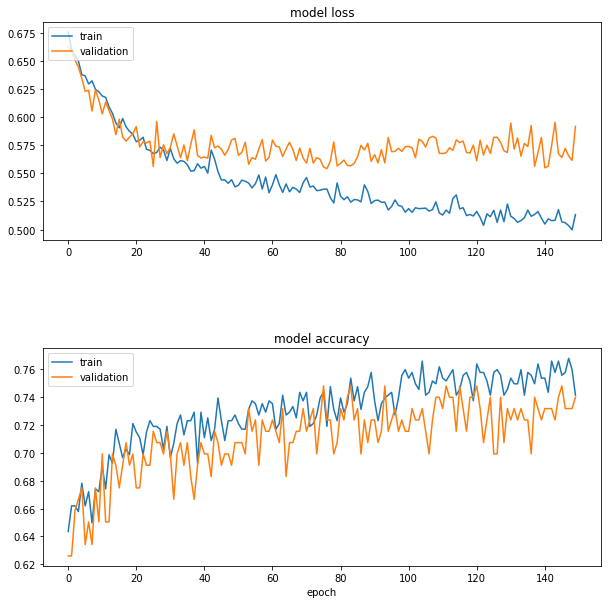

In [0]:
plot_acc_loss(history)

### Evaluate the model
Now that we have trained our model, we can evaluate the performance on the test data prepared earlier. This is done with the `evaluate` function, simply supply the input and target parameters to the function.

The value printed out is the accuracy (%).

In [0]:
scores = model.evaluate(X_test, y_test)
print("\n{0}: {1:.2f}%".format(model.metrics_names[1], scores[1]*100))

154/154 [==============================] - 0s 82us/step

acc: 79.22%


### Confusion matrix

C(0,0) true positives
C(1,0) false negatives
C(1,1) true negatives
C(0,1) false positives 

In [0]:
def draw_confusion_matrix(true, pred, labels):
  """
  Drawing confusion matrix
  """
  
  cm = metrics.confusion_matrix(true, pred, labels)
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax)
  ax.set_xticklabels(['']+labels)
  ax.set_yticklabels(['']+labels)
  ax.set_xlabel("Predicted")
  ax.set_ylabel("True")
  plt.show()
  
  return cm

In [0]:
y_pred = model.predict_classes(X_test)

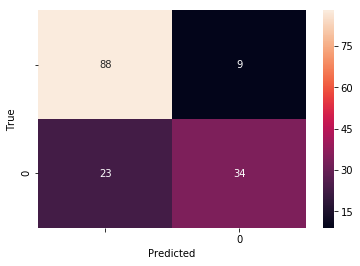

In [0]:
matrix = draw_confusion_matrix(y_test, y_pred, [0,1])

In [0]:
np.sum(np.diag(matrix))/np.sum(matrix)

0.7922077922077922